In [7]:
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv("data 4 ver1.csv")
dataset

,CGPA,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills,Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?,Role
0,8.0,yes,no,excellent,no,no,yes,yes,no,no,no,no,yes,no,no,no,no,no,no,Developer
1,8.8,yes,no,poor,yes,no,yes,no,no,no,no,yes,yes,no,no,no,yes,no,no,ML engineer
2,7.9,no,no,poor,no,yes,no,no,yes,no,no,no,yes,yes,no,no,no,no,no,Management
3,8.0,yes,no,medium,yes,no,yes,yes,no,no,yes,no,no,no,no,no,no,no,yes,Developer
4,6.4,no,no,poor,no,yes,yes,no,yes,no,no,no,yes,no,no,no,no,yes,no,Marketing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,7.5,yes,no,excellent,yes,no,yes,yes,yes,no,no,no,yes,no,no,no,no,no,no,Developer
495,7.4,yes,no,excellent,no,no,yes,yes,yes,no,no,no,yes,no,no,no,no,no,yes,Computer Analyst
496,9.2,yes,no,medium,yes,no,yes,no,no,no,no,yes,no,no,no,no,yes,no,yes,ML engineer
497,8.5,yes,no,excellent,yes,yes,yes,yes,yes,no,no,no,yes,no,no,no,no,no,yes,Developer


In [9]:
df = dataset
df = df.drop(['CGPA'],axis=1)
df.describe()

,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills,Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?,Role
count,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499
unique,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,10
top,no,no,excellent,no,no,yes,no,yes,no,no,no,yes,no,no,no,no,no,no,Developer
freq,265,388,172,256,317,320,351,282,470,367,377,417,352,370,439,406,333,348,126


In [10]:
data = df.iloc[:,:-1].values
label = df.iloc[:,-1].values
data.shape

(499, 18)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

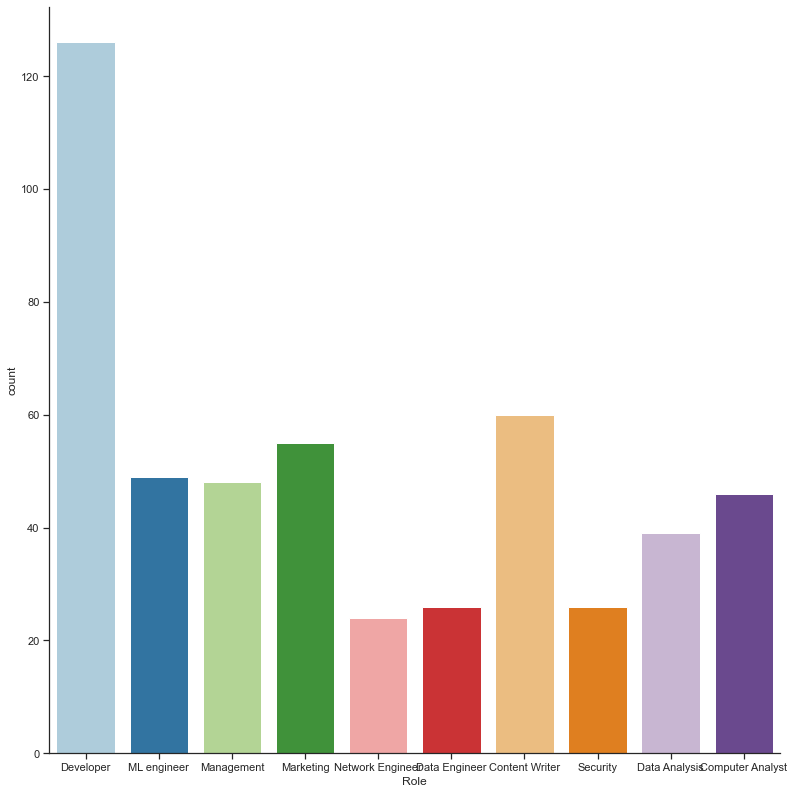

In [12]:
sns.catplot(x="Role", kind="count", palette="Paired",height=11, data=df)

# Encoding data

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [14]:
labelencoder = LabelEncoder()

In [15]:
for i in range(0,18):
    data[:,i] = labelencoder.fit_transform(data[:,i])
data
integer_encoded = data[:,2]
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
a = data[:,0:2]
b = onehot_encoded
c = data[:,3:]
data1 = np.concatenate((a, b), 1)
data1 = np.concatenate((data1, c), 1)
data1

array([[1, 0, 1.0, ..., 0, 0, 0],
       [1, 0, 0.0, ..., 1, 0, 0],
       [0, 0, 0.0, ..., 0, 0, 0],
       ...,
       [1, 0, 0.0, ..., 1, 0, 1],
       [1, 0, 1.0, ..., 0, 0, 1],
       [0, 0, 0.0, ..., 0, 1, 0]], dtype=object)

In [16]:
label = labelencoder.fit_transform(label)
label

array([4, 5, 6, 4, 7, 8, 4, 3, 8, 1, 1, 4, 5, 4, 4, 9, 3, 4, 8, 4, 4, 2,
       4, 6, 4, 0, 5, 4, 7, 6, 2, 0, 4, 5, 7, 1, 4, 5, 7, 1, 4, 4, 2, 6,
       0, 9, 4, 6, 7, 9, 3, 2, 8, 0, 5, 4, 7, 6, 9, 8, 1, 5, 6, 1, 0, 8,
       9, 1, 3, 4, 4, 4, 2, 6, 3, 4, 5, 0, 3, 4, 9, 7, 1, 8, 7, 4, 9, 3,
       1, 0, 6, 5, 9, 5, 1, 5, 6, 1, 0, 7, 1, 1, 0, 8, 9, 4, 3, 6, 0, 4,
       7, 6, 0, 1, 1, 8, 4, 2, 6, 3, 4, 5, 0, 5, 7, 1, 4, 2, 6, 4, 7, 8,
       4, 4, 3, 0, 1, 1, 4, 5, 4, 9, 9, 7, 1, 1, 4, 2, 6, 4, 7, 8, 9, 3,
       1, 0, 6, 5, 7, 1, 4, 8, 4, 8, 4, 9, 9, 7, 1, 6, 6, 0, 4, 7, 6, 2,
       0, 4, 8, 5, 1, 5, 3, 2, 5, 7, 1, 4, 1, 4, 7, 6, 2, 0, 4, 9, 5, 1,
       5, 6, 8, 4, 5, 0, 3, 4, 9, 7, 1, 4, 0, 5, 4, 7, 6, 2, 7, 6, 2, 0,
       4, 8, 5, 1, 5, 6, 1, 4, 5, 0, 0, 4, 7, 6, 2, 0, 4, 9, 5, 1, 5, 8,
       2, 3, 4, 9, 2, 8, 4, 5, 0, 0, 5, 7, 1, 4, 2, 6, 4, 8, 4, 4, 7, 4,
       4, 2, 4, 6, 4, 0, 5, 4, 7, 6, 2, 0, 4, 5, 7, 1, 4, 5, 7, 1, 4, 6,
       4, 7, 4, 4, 3, 0, 1, 1, 4, 5, 4, 9, 3, 4, 7,

In [17]:
# data1 = data

In [18]:
from sklearn.preprocessing import Normalizer

In [19]:
list(df.columns)

['Did you do webdev during college time ?',
 'Are you good at Data analysis ?',
 'reading and writing skills',
 'Are you a tech person ?',
 'Were you in a non tech society ?',
 'Are you good at coding ?',
 'Have you developed mobile apps ?',
 'Are you good at communication ?',
 'Do you have specialization in security',
 'Have you ever handled large databases ?',
 'Do you have knowlege of statistics and data science?',
 'Are you proficient in English ?',
 'Have you ever managed some event?',
 'Do you write technical blogs ?',
 'Are you into marketing ?',
 'Are you a ML expert ?',
 'Do you have a lot of connections ?',
 'Have you ever built live project ?',
 'Role']

## adding headers

In [20]:
X1 = pd.DataFrame(data1,columns=['Did you do webdev during college time ?',
 'Are you good at Data analysis ?',
 'reading and writing skills(exelent)',
 'reading and writing skills(medium)',
 'reading and writing skills(poor)',                               
 'Are you a tech person ?',
 'Were you in a non tech society ?',
 'Are you good at coding ?',
 'Have you developed mobile apps ?',
 'Are you good at communication ?',
 'Do you have specialization in security ',
 'Have you ever handled large databases ?',
 'Do you have knowlege of statistics and data science?',
 'Are you proficient in English ?',
 'Have you ever managed some event?',
 'Do you write technical blogs ?',
 'Are you into marketing ?',
 'Are you a ML expert ?',
 'Do you have a lot of connections ?',
 'Have you ever built live project ?'])

In [21]:
print(X1.shape)
X1.head(80)

(499, 20)


,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills(exelent),reading and writing skills(medium),reading and writing skills(poor),Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?
0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
2,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
3,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,0,1,0,1,1,1,0,1,0,1,0,1,0,0,0,0
76,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1
77,0,1,0,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,1
78,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [22]:
y=pd.DataFrame(label,columns=["Suggested Job Role"])
y.head()

,Suggested Job Role
0,4
1,5
2,6
3,4
4,7


# Decision Tree Using Gini

In [23]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state= 14) 
X1

,Did you do webdev during college time ?,Are you good at Data analysis ?,reading and writing skills(exelent),reading and writing skills(medium),reading and writing skills(poor),Are you a tech person ?,Were you in a non tech society ?,Are you good at coding ?,Have you developed mobile apps ?,Are you good at communication ?,Do you have specialization in security,Have you ever handled large databases ?,Do you have knowlege of statistics and data science?,Are you proficient in English ?,Have you ever managed some event?,Do you write technical blogs ?,Are you into marketing ?,Are you a ML expert ?,Do you have a lot of connections ?,Have you ever built live project ?
0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
2,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0
3,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0
495,1,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1
496,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1
497,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1


In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [26]:
print("max_depth     accuracy")
for x in range(1,11):
    clf = tree.DecisionTreeClassifier(max_depth = x,criterion = "gini")
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    print(x,"          ",accuracy)

max_depth     accuracy
1            0.312
2            0.408
3            0.48
4            0.664
5            0.792
6            0.808
7            0.848
8            0.832
9            0.832
10            0.832


In [27]:
clf = tree.DecisionTreeClassifier(max_depth = 7,criterion = "gini")
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [28]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrix")
print(cm)
print("Accuracy = ",accuracy)

confusion matrix
[[ 8  0  0  0  0  1  0  0  0  0]
 [ 0 17  3  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0]
 [ 0  0  1  0 30  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0  9  1  0  0]
 [ 0  0  2  0  1  0  2  9  0  0]
 [ 0  1  1  0  3  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  8]]
Accuracy =  0.856


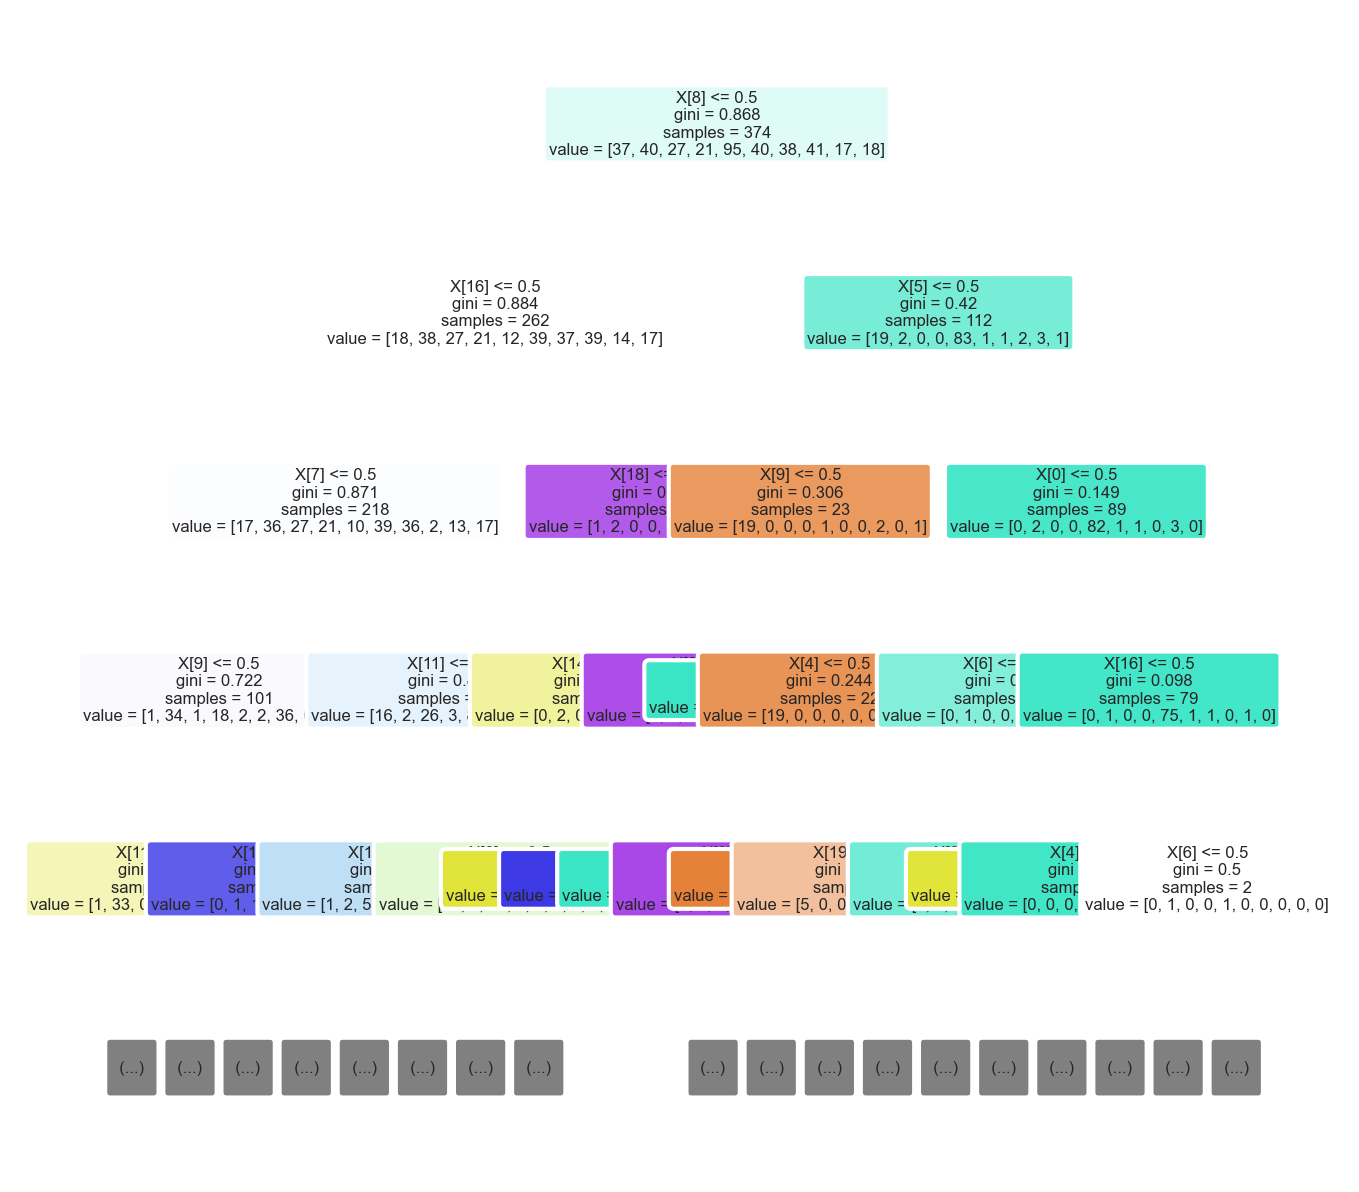

In [29]:
# fig = plt.figure(figsize=(20,25))
# _ = tree.plot_tree(clf, filled=True)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf,filled=True,fontsize=4,max_depth=4,rounded=True);
# fig.savefig('imagename.png')

# Decision tree with entropy

In [30]:
print("max_depth     accuracy")
for x in range(1,11):
    clf = tree.DecisionTreeClassifier(max_depth = x,criterion = "entropy")
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    print(x,"          ",accuracy)

max_depth     accuracy
1            0.352
2            0.552
3            0.712
4            0.792
5            0.872
6            0.872
7            0.872
8            0.864
9            0.848
10            0.856


In [31]:
clf2 = tree.DecisionTreeClassifier(max_depth = 5,criterion = "entropy")
clf2 = clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [32]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrix")
print(cm)
print("Accuracy = ",accuracy)

confusion matrix
[[ 8  0  0  0  0  1  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  3  2  0  0  0  0  0]
 [ 0  0  1  0 30  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0  9  1  0  0]
 [ 0  0  0  0  1  0  2 11  0  0]
 [ 0  1  0  0  3  1  0  2  0  0]
 [ 1  0  0  0  0  0  0  0  0  7]]
Accuracy =  0.872


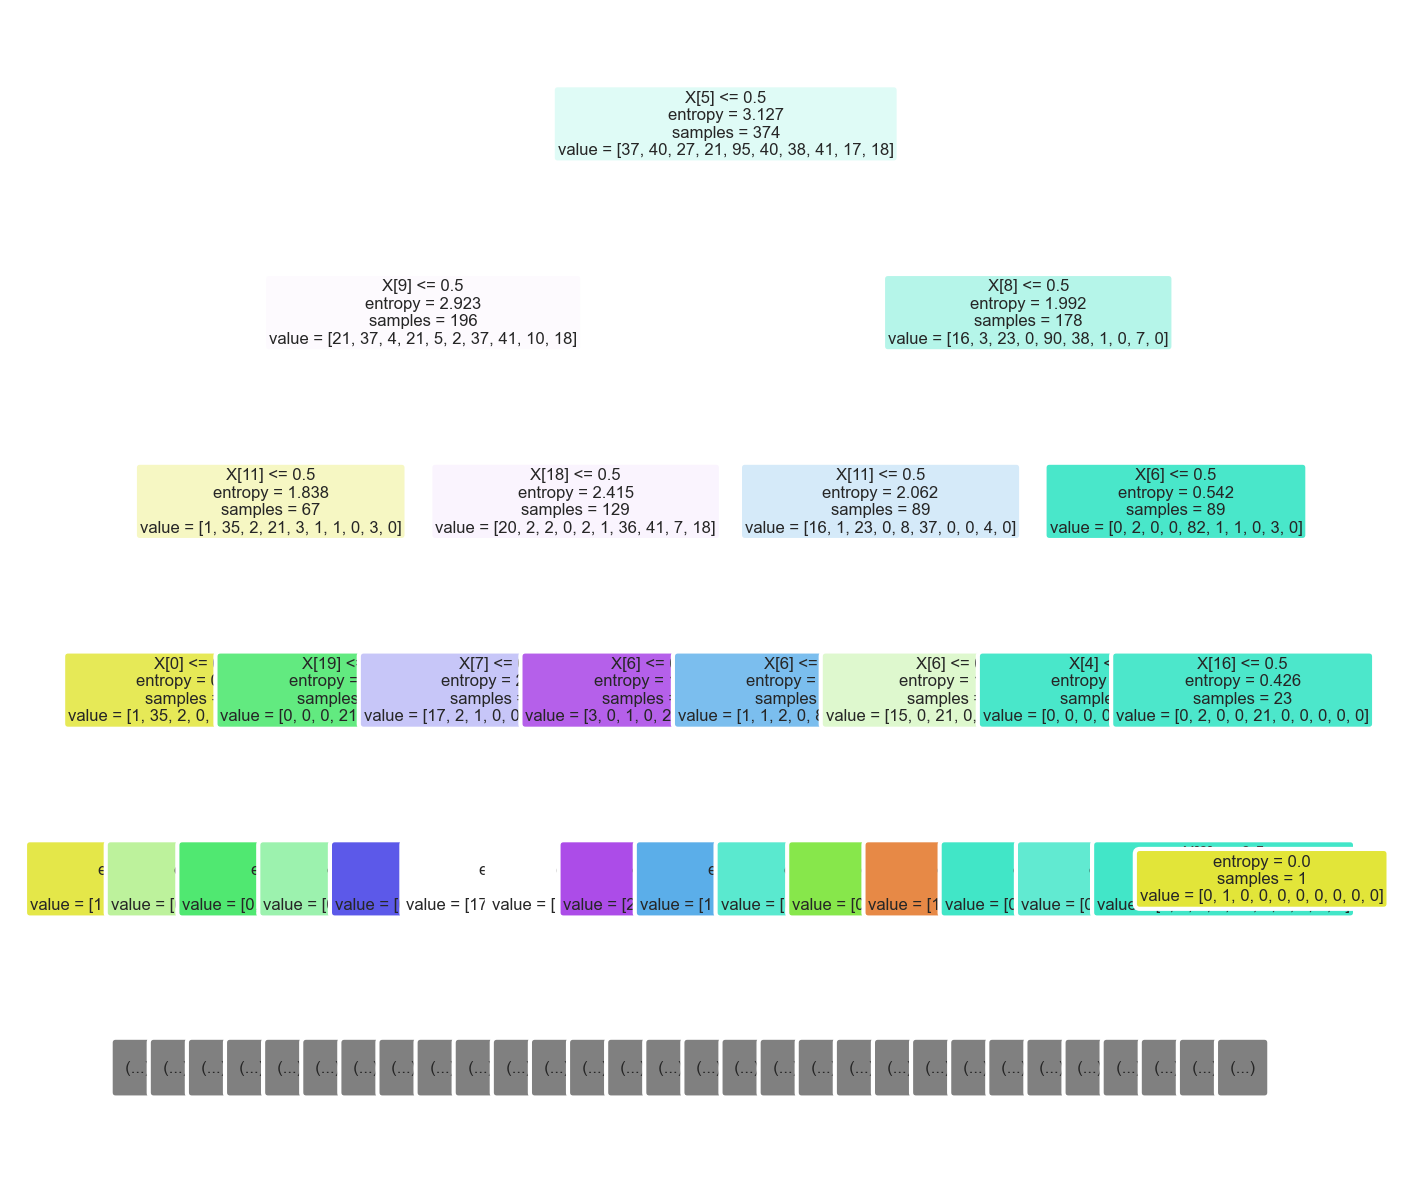

In [33]:
# fig = plt.figure(figsize=(20,25))
# _ = tree.plot_tree(clf, filled=True)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(clf2,filled=True,fontsize=4,max_depth=4,rounded=True);
# fig.savefig('imagename.png')

# SVM (Support vector machine) classifier

In [34]:
from sklearn import svm

In [35]:
clf = svm.SVC()
clf.fit(X_train, y_train)

c:\users\mansi\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [36]:
svm_y_pred = clf.predict(X_test)

In [37]:
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)

In [38]:
print("confusion matrix")
print(svm_cm)
print("Accuracy = ",svm_accuracy*100)

confusion matrix
[[ 8  0  1  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0]
 [ 0  0  1  0 30  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0  9  1  0  0]
 [ 0  0  0  0  1  0  2 11  0  0]
 [ 0  1  0  0  3  1  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  8]]
Accuracy =  89.60000000000001
